# Get Started with TensorFlow2

## Hello TensorFlow!

In [ ]:
import tensorflow as tf # Import TensorFlow library.

print(tf.__version__) # When writing this tutorial, the version of TensorFlow is 2.13.0.

2.13.0


In [ ]:
# After going through the tutorial, you will be able to:
# - Understand the basic concepts of TensorFlow.
# - Build a simple neural network with TensorFlow.
# - Train the neural network with your own data.
# - Know how to control the training process.
# - Save the trained model and load it for future use.

# In the tutorial, repetitive import of TensorFlow modules will not be done in the same section.
import pandas as pd
data_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None).to_numpy()
X_train, y_train = data_train[:,1:], data_train[:,0]
# Normalize the data.
X_train = X_train / 255

# Build a simple neural network with 4 layers.
# Dense layer: Each neuron in the layer is connected to all the neurons in the previous layer.
# Also known as fully connected layer.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(784, activation='relu'), # Dense layer with 784 neurons.
    tf.keras.layers.Dense(128, activation='relu'), # Dense layer with 128 neurons.
    tf.keras.layers.Dense(16, activation='relu'), # Dense layer with 16 neurons.
    tf.keras.layers.Dense(10, activation='softmax') # Dense layer with 10 neurons.
])

# Compile the model.
model.compile(optimizer='adam', # Adam optimizer.
              loss='sparse_categorical_crossentropy', # Cross-entropy loss function.
              metrics=['accuracy']) # Classification accuracy.
# Train the model.
model.fit(X_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
625/625 [==============================] - 12s 17ms/step - loss: 0.3502 - accuracy: 0.8942
Epoch 2/3
625/625 [==============================] - 11s 18ms/step - loss: 0.1253 - accuracy: 0.9615
Epoch 3/3
625/625 [==============================] - 12s 19ms/step - loss: 0.0819 - accuracy: 0.9747


## The Sequential model

- [Sequential](https://www.tensorflow.org/versions/r2.13/api_docs/python/tf/keras/Sequential)
- [Flatten](https://www.tensorflow.org/versions/r2.13/api_docs/python/tf/keras/layers/Flatten)
- [Dense](https://www.tensorflow.org/versions/r2.13/api_docs/python/tf/keras/layers/Dense)
- [Softmax](https://www.tensorflow.org/versions/r2.13/api_docs/python/tf/keras/layers/Softmax)

### Feedforward neural networks

In [ ]:
# Check the link above for more details.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax

In [ ]:
# Build a model using the Sequential API.
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(784,)),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
# Check the architecture of the model.
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Alternatively, we can also build a model using the Sequential API like this.
model2 = Sequential()
# We can add layers one by one.
model2.add(Dense(16, activation='relu', input_shape=(784,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(10, activation='softmax')) # Softmax activation for classification.
# Exactly the same model as above.
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                12560     
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Add Softmax() separately
# Identical to model1
model3 = Sequential([
    Dense(16, activation='relu', input_shape=(784,)),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                12560     
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Assign names to the layers
# You can assign any name to a layer by specifying the name parameter in its constructor.
model4 = Sequential([
    Dense(16, activation='relu', input_shape=(784,), name='layer_1'), # Here we assign the name 'layer_1' to this layer.
    Dense(16, activation='relu', name='layer_2'),
    Dense(10, activation='softmax', name='layer_3')
])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 layer_2 (Dense)             (None, 16)                272       
                                                                 
 layer_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Convolutional and pooling layers

- [Conv2D](https://www.tensorflow.org/versions/r2.13/api_docs/python/tf/keras/layers/Conv2D)
- [MaxPooling2D](https://www.tensorflow.org/versions/r2.13/api_docs/python/tf/keras/layers/MaxPooling2D)

**Q**: Why are pooling layers often included in convolutional neural networks?  
**A**:
1. To allow a degree of translational invariance on the input.
2. To downsample the spatial dimensions, thereby reducing the number of network parameters.

In [ ]:
# Check the link above for more details.
from tensorflow.keras.layers import Conv2D, MaxPooling2D # Convolutional layers and pooling layers are typically used for image data.

In [ ]:
cnn_without_padding = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 16 filters, each filter is 3x3, input shape is 28x28x1. '1' means the image is grayscale.
    MaxPooling2D((3, 3)), # MaxPooling layer with a 3x3 filter.
    Flatten(), # Flatten the output of the previous layer to 1D.
    Dense(10, activation='softmax')
])
cnn_without_padding.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 16)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Use padding='SAME' to add padding to the input.
cnn_with_padding = Sequential([
    Conv2D(16, (3, 3), padding='SAME', activation='relu', input_shape=(28, 28, 1)), # 'SAME' means the output has the same size as the input.
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])
cnn_with_padding.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1296)              0         
                                                                 
 dense_14 (Dense)            (None, 10)                12970     
                                                                 
Total params: 13130 (51.29 KB)
Trainable params: 13130 (51.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# If you want to use channels_first data format, you should specify it at two places.
cnn_first_channel = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(1, 28, 28), data_format='channels_first'), # 'channels_first' means the color channel comes first.
    MaxPooling2D((3, 3), data_format='channels_first'), # Again, specify the data format.
    Flatten(),
    Dense(10, activation='softmax')
])
cnn_first_channel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 26, 26)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 8, 8)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### The compile method
- [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile)
- [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
- [SparseCategoricalAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy)
- [MeanAbsoluteError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError)

In [ ]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
# Build the model using the compile method.
# We need to specify the optimizer, loss function, and metrics to monitor during training.
model.compile(optimizer='adam', # Options: 'sgd', etc.
              loss='sparse_categorical_crossentropy', # Options: 'categorical_crossentropy', etc.
              metrics=['accuracy']) # Options: 'mae', etc.
print(model.optimizer)
print(model.loss)
print(model.compiled_metrics._metrics) # >>> print(model.metrics) >>> []

sparse_categorical_crossentropy
['accuracy']


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy, MeanAbsoluteError

# Customize an optimizer
optimizer = Adam(learning_rate=1e-4)
acc = SparseCategoricalAccuracy()
mae = MeanAbsoluteError()
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae]) # Instead of passing a string, we pass an instance of the loss/metric class.
print(model.optimizer)
print(model.optimizer.lr)
print(model.loss)
print(model.compiled_metrics._metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>
sparse_categorical_crossentropy
[<keras.src.metrics.accuracy_metrics.SparseCategoricalAccuracy object at 0x7b94317f8610>, <keras.src.metrics.regression_metrics.MeanAbsoluteError object at 0x7b94317fa3e0>]


### The fit method
- [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)
- [fashion_mnist](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import fashion_mnist # Import FashionMNIST dataset. Check the link above for more details.

# Load FashionMNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Normalize the images.
train_images = train_images / 255.
test_images = test_images / 255.

# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
# Define the optimizer, loss function and metrics before compiling.
opt = Adam(learning_rate=5e-3)
acc = SparseCategoricalAccuracy()
mae = MeanAbsoluteError()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae])

4422102/4422102 [==============================] - 0s 0us/step


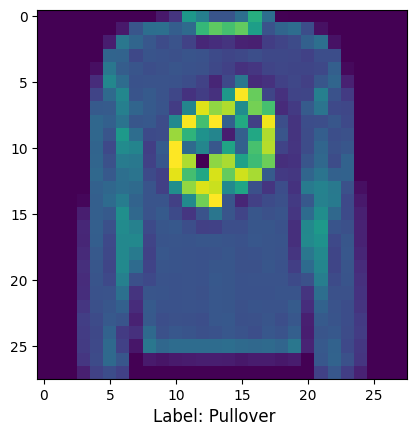

In [ ]:
# Define labels for FashionMNIST
# Here we just hard code the labels for FashionMNIST.
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

i = 123 # You can change this number to check other images as you like.
image = train_images[i, :, :]
plt.imshow(image)
plt.suptitle(f"Label: {labels[train_labels[i]]}", y=0.05)
plt.show()

In [ ]:
# When feeding the data to the model, we need to add a channel dimension to the data.
model.fit(train_images[..., np.newaxis], train_labels, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 15s 62ms/step - loss: 0.5695 - sparse_categorical_accuracy: 0.8035 - mean_absolute_error: 4.4200
Epoch 2/5
235/235 [==============================] - 15s 63ms/step - loss: 0.3711 - sparse_categorical_accuracy: 0.8688 - mean_absolute_error: 4.4200
Epoch 3/5
235/235 [==============================] - 16s 68ms/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8837 - mean_absolute_error: 4.4200
Epoch 4/5
235/235 [==============================] - 15s 62ms/step - loss: 0.3100 - sparse_categorical_accuracy: 0.8906 - mean_absolute_error: 4.4200
Epoch 5/5
235/235 [==============================] - 15s 62ms/step - loss: 0.2976 - sparse_categorical_accuracy: 0.8932 - mean_absolute_error: 4.4200


In [ ]:
# Similarly, we need to add a channel dimension to the train data.
# Addtionally, we can record the history of the training process.
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10, batch_size=256, verbose=2)

Epoch 1/10
235/235 - 15s - loss: 0.2878 - sparse_categorical_accuracy: 0.8968 - mean_absolute_error: 4.4200 - 15s/epoch - 63ms/step
Epoch 2/10
235/235 - 13s - loss: 0.2785 - sparse_categorical_accuracy: 0.9004 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 3/10
235/235 - 13s - loss: 0.2728 - sparse_categorical_accuracy: 0.9024 - mean_absolute_error: 4.4200 - 13s/epoch - 55ms/step
Epoch 4/10
235/235 - 13s - loss: 0.2706 - sparse_categorical_accuracy: 0.9017 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 5/10
235/235 - 13s - loss: 0.2650 - sparse_categorical_accuracy: 0.9042 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 6/10
235/235 - 13s - loss: 0.2593 - sparse_categorical_accuracy: 0.9064 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 7/10
235/235 - 13s - loss: 0.2535 - sparse_categorical_accuracy: 0.9078 - mean_absolute_error: 4.4200 - 13s/epoch - 55ms/step
Epoch 8/10
235/235 - 13s - loss: 0.2499 - sparse_categorical_accuracy: 0.908

In [ ]:
# Load the history into a pandas DataFrame
df = pd.DataFrame(history.history)
df.head(10)

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.287817,0.896800,4.420001
1,0.278539,0.900400,4.419999
2,0.272847,0.902367,4.420000
3,0.270589,0.901667,4.420000
4,0.265013,0.904167,4.420000
5,0.259324,0.906350,4.420000
6,0.253521,0.907800,4.420000
7,0.249851,0.908483,4.420000
8,0.245694,0.910683,4.420000
9,0.245112,0.910800,4.420001


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

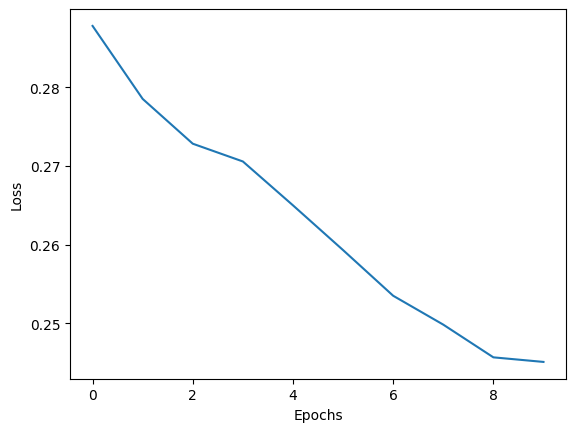

In [ ]:
# Let's plot the history.
loss_plot = df.plot(y="loss", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

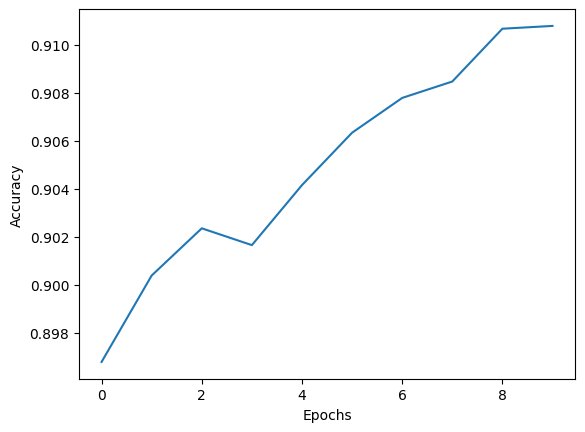

In [ ]:
acc_plot = df.plot(y="sparse_categorical_accuracy", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

### The evaluate and predict methods
- [evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#evaluate)
- [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict)

In [ ]:
# Add a channel dimension to the test data as well.
loss, acc, mae = model.evaluate(test_images[..., np.newaxis], test_labels)
print(f"{loss:.2f}")
print(f"{acc:.2f}")
print(f"{mae:.2f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3107 - sparse_categorical_accuracy: 0.8907 - mean_absolute_error: 4.4200
0.31
0.89
4.42


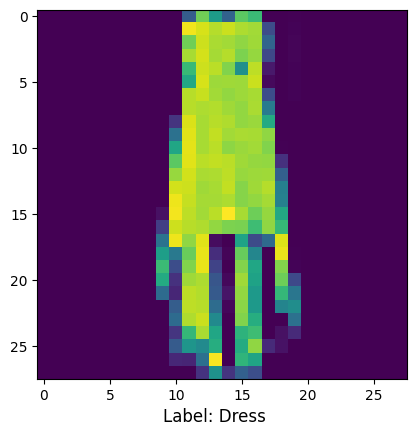

In [ ]:
# Randomly choose a test image
i = np.random.choice(test_images.shape[0])

test_image = test_images[i]
plt.imshow(test_image)
plt.suptitle(f"Label: {labels[test_labels[i]]}", y=0.05)
plt.show()

## Validation, regularization and callbacks

### Validation

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the diabetes dataset
diabetes_dataset = load_diabetes()
# print(diabetes_dataset['DESCR'])

# Save the input and target variables
data = diabetes_dataset['data']
target = diabetes_dataset['target']

# Normalize target values
target = (target - target.mean(axis=0)) / target.std()

# In practice, it is recommended to split the data into training set and test set.
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

def return_model():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
      *[Dense(128, activation='relu') for _ in range(5)], # This is a list comprehension. It is simpler than adding layers one by one.
      Dense(1)
  ])
  return model

model = return_model()

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               1408      
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 1)               

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False) # Train/Test/Validation: 76.5/13.5/10. Rememeber we've already split the data into train/test.

In [ ]:
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.9341 - mae: 0.7578 - 25ms/epoch - 13ms/step


[0.9341440796852112, 0.7578440308570862]

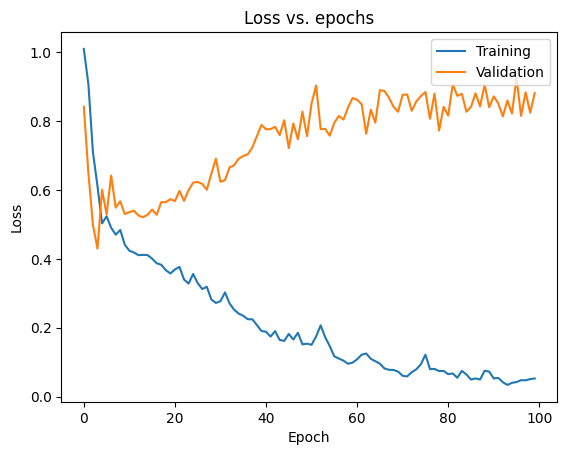

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() # You can observe overfitting below.

### Regularization
- [l1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1)
- [l2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)
- [l1_l2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/l1_l2)
- [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2 #, l1, l1_l2 # Feel free to try other regularizers

def return_reg_model(weight_decay, dropout_rate):
  model_reg = Sequential([
      Dense(128, activation='relu', kernel_regularizer=l2(weight_decay), input_shape=(train_data.shape[1], )), # Add regularization to the first layer.
      Dropout(dropout_rate),
      *[Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)) for _ in range(5)] # Add regularization to the rest of the layers.
      + [Dropout(dropout_rate) for _ in range(5)],
      Dense(1)
  ])
  return model_reg

weight_decay = 1e-5
dropout_rate = 0.3
model_reg = return_reg_model(weight_decay, dropout_rate)

model_reg.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history = model_reg.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

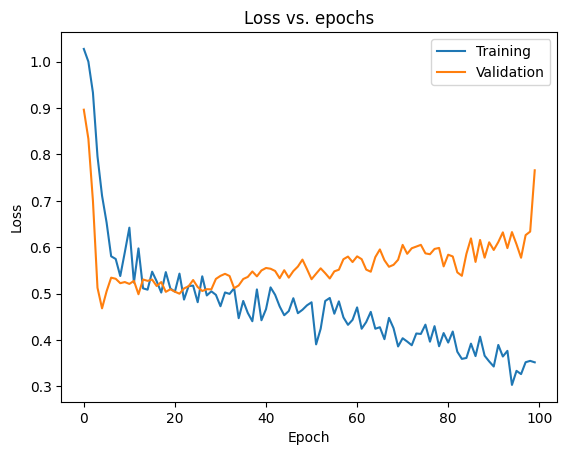

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() # Less overfitting now.

### Callbacks
- [Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

In [ ]:
# Here we will learn very basic ways to control the training process.
from tensorflow.keras.callbacks import Callback # Check the link above for more details.

# Customize a callback
# We only discuss very basic callbacks here.
class PrintCallback(Callback):
  # These methods are overriden from the base class.
  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_train_end(self, logs=None):
    print("Finished training.")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting training: Epoch {epoch}...")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished training: Epoch {epoch}.")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Starting training: Batch {batch}...")

  def on_train_batch_end(self, batch, logs=None):
    print(f"Finished training: Batch {batch}.")

model.compile(optimizer='adam', loss='mse')
model.fit(train_data, train_target,
          epochs=3, batch_size=128,
          verbose=False, callbacks=[PrintCallback()]) # Pass the callback to the callbacks argument. We can see the training process is controlled by the callback.

Starting training...
Starting training: Epoch 0...
Starting training: Batch 0...
Finished training: Batch 0.
Starting training: Batch 1...
Finished training: Batch 1.
Starting training: Batch 2...
Finished training: Batch 2.
Starting training: Batch 3...
Finished training: Batch 3.
Finished training: Epoch 0.
Starting training: Epoch 1...
Starting training: Batch 0...
Finished training: Batch 0.
Starting training: Batch 1...
Finished training: Batch 1.
Starting training: Batch 2...
Finished training: Batch 2.
Starting training: Batch 3...
Finished training: Batch 3.
Finished training: Epoch 1.
Starting training: Epoch 2...
Starting training: Batch 0...
Finished training: Batch 0.
Starting training: Batch 1...
Finished training: Batch 1.
Starting training: Batch 2...
Finished training: Batch 2.
Starting training: Batch 3...
Finished training: Batch 3.
Finished training: Epoch 2.
Finished training.


In [ ]:
class TestCallback(Callback):

  def on_test_begin(self, logs=None):
    print("Starting testing...")

  def on_test_end(self, logs=None):
    print("Finished testing.")

  def on_test_batch_begin(self, batch, logs=None):
    print(f"Starting testing: Batch {batch}...")

  def on_test_batch_end(self, batch, logs=None):
    print(f"Finished testing: Batch {batch}.")

model.evaluate(test_data, test_target, verbose=False, callbacks=[TestCallback()]) # Similarly, we can control the testing process by the callback.

Starting testing...
Starting testing: Batch 0...
Finished testing: Batch 0.
Starting testing: Batch 1...
Finished testing: Batch 1.
Finished testing.


0.7691945433616638

In [ ]:
class PredictCallback(Callback):
  def on_predict_begin(self, logs=None):
    print("Starting predicting...")

  def on_predict_end(self, logs=None):
    print("Finished predicting.")

  def on_predict_batch_begin(self, batch, logs=None):
    print(f"Starting predicting: Batch {batch}...")

  def on_predict_batch_end(self, batch, logs=None):
    print(f"Finished predicting: Batch {batch}.")

model.predict(test_data, verbose=False, callbacks=[PredictCallback()]) # And the prediction process.

Starting predicting...
Starting predicting: Batch 0...
Finished predicting: Batch 0.
Starting predicting: Batch 1...
Finished predicting: Batch 1.
Finished predicting.


array([[ 1.7291763 ],
       [ 1.5043678 ],
       [ 0.45507964],
       [ 0.6962442 ],
       [ 1.6054158 ],
       [-0.5854941 ],
       [ 0.20371087],
       [ 0.7324006 ],
       [-0.67208976],
       [ 1.1110679 ],
       [-0.5981601 ],
       [ 0.74982506],
       [-0.57346   ],
       [ 1.6496239 ],
       [-0.4098229 ],
       [ 0.0470733 ],
       [ 0.49551338],
       [ 0.5003413 ],
       [ 0.8067464 ],
       [-0.4002813 ],
       [-0.19058242],
       [-0.67089367],
       [ 1.5819683 ],
       [-0.55236065],
       [-0.5961629 ],
       [ 0.80841   ],
       [ 0.52900505],
       [ 0.14693832],
       [ 1.217536  ],
       [ 1.2247186 ],
       [ 1.0309103 ],
       [ 1.1958643 ],
       [-0.6196973 ],
       [-0.23586388],
       [ 0.55607903],
       [ 0.8859357 ],
       [ 0.9631322 ],
       [ 1.6938013 ],
       [-0.22664051],
       [ 1.5736367 ],
       [ 1.0555464 ],
       [-0.65311354],
       [ 0.22281677],
       [ 1.3568466 ],
       [ 0.9713486 ]], dtype=flo

### EarlyStopping
- [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # Check the link above for more details.

model = return_model()

model.compile(optimizer='adam', loss='mse')
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False,
                    callbacks=[EarlyStopping(patience=10)])
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.5554 - 25ms/epoch - 12ms/step


0.5554227828979492

In [ ]:
weight_decay = 1e-8
dropout_rate = 0.2

model_reg = return_reg_model(weight_decay, dropout_rate)

model_reg.compile(optimizer='adam', loss='mse')
history_reg = model_reg.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False,
                    callbacks=[EarlyStopping(patience=10)]) # Apply early stopping.
model_reg.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.5376 - 24ms/epoch - 12ms/step


0.5376090407371521

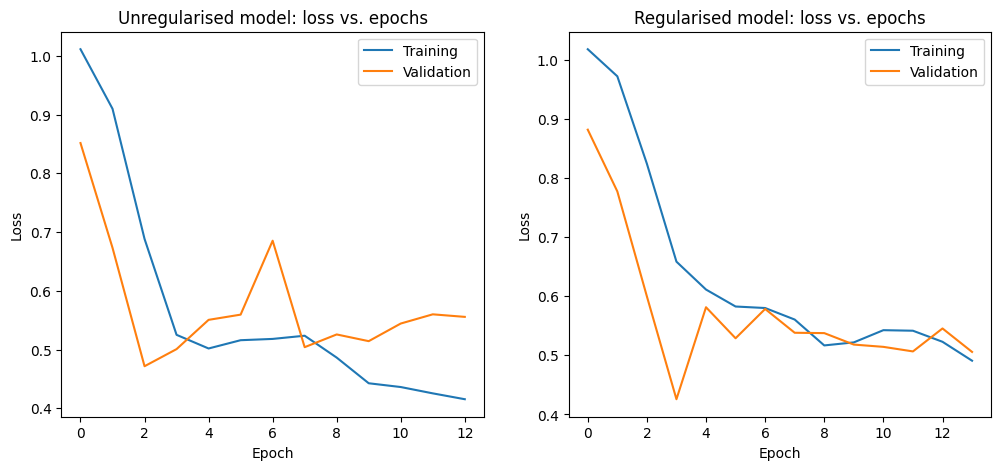

In [ ]:
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

## Saving and loading

### Saving and loading model weights
- [CIFAR10](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10)
- [ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)

In [ ]:
# In this section, we will learn how to save and load a model.
# Specifically, we will learn how to use ModelCheckpoint to save the best model during training.
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train / 255.
X_test = X_test / 255.

def subset(array, sample_size):
  return array[:sample_size]

X_train = subset(X_train, 10000)
y_train = subset(y_train, 10000)
X_test = subset(X_test, 1000)
y_test = subset(y_test, 1000)

170498071/170498071 [==============================] - 2s 0us/step


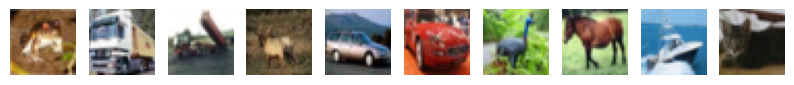

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

def cifar_classifier():
  # Construct a simple CNN architecture.
  model = Sequential([
      Conv2D(16, activation='relu', input_shape=(32, 32, 3), kernel_size=(3, 3)),
      Conv2D(8, activation='relu', kernel_size=(3, 3)),
      MaxPooling2D((4, 4)),
      Flatten(),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

clf = cifar_classifier()
clf.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 392)               0         
                                                                 
 dense_47 (Dense)            (None, 32)                12576     
                                                                 
 dense_48 (Dense)            (None, 10)                330       
                                                     

In [ ]:
# Random guessing now
clf.evaluate(X_test, y_test, verbose=0) # Accuracy should be ~10%.

[2.3141958713531494, 0.09799999743700027]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model_checkpoints/checkpoint', # Save the model to this filepath
                             frequency='epoch', # Save the model after every epoch
                             save_weights_only=True, # Only save the weights.
                             verbose=1)
clf.fit(X_train, y_train, epochs=2, callbacks=[checkpoint])

Epoch 1/2
312/313 [============================>.] - ETA: 0s - loss: 1.9928 - accuracy: 0.2606
Epoch 1: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 11s 32ms/step - loss: 1.9918 - accuracy: 0.2609
Epoch 2/2
312/313 [============================>.] - ETA: 0s - loss: 1.6369 - accuracy: 0.4106
Epoch 2: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 9s 30ms/step - loss: 1.6366 - accuracy: 0.4106


In [ ]:
# Terminal command to review the checkpoints we created just now
! ls -lh model_checkpoints

total 184K
-rw-r--r-- 1 root root   77 Oct 20 15:03 checkpoint
-rw-r--r-- 1 root root 174K Oct 20 15:03 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:03 checkpoint.index


In [ ]:
# Evaluate it again
clf.evaluate(X_test, y_test, verbose=0)

[1.5912542343139648, 0.4309999942779541]

In [ ]:
# Define a new model
clf_new = cifar_classifier()
clf_new.evaluate(X_test, y_test, verbose=0)

[2.3858590126037598, 0.10300000011920929]

In [ ]:
# Load the weights trained before
clf_new.load_weights('model_checkpoints/checkpoint')
clf_new.evaluate(X_test, y_test, verbose=0)

[1.5912542343139648, 0.4309999942779541]

In [ ]:
# Terminal command to delete checkpoints we created just now
! rm -r model_checkpoints

### Saving criteria

In [ ]:
checkpoint = ModelCheckpoint(
    filepath='model_checkpoints/checkpoint_{epoch:02d}_{batch:04d}', # Save the model at every epoch and every batch.
    save_weights_only=True, # Only save the weights.
    save_freq=500, # Save the model every 500 batches.
    verbose=1
)

clf = cifar_classifier()
clf.fit(X_train, y_train, epochs=3,
        validation_data=(X_test, y_test), batch_size=10,
        callbacks=[checkpoint])

Epoch 1/3
 497/1000 [=============>................] - ETA: 5s - loss: 2.0404 - accuracy: 0.2441
Epoch 1: saving model to model_checkpoints/checkpoint_01_0500
 995/1000 [============================>.] - ETA: 0s - loss: 1.8497 - accuracy: 0.3215
Epoch 1: saving model to model_checkpoints/checkpoint_01_1000
1000/1000 [==============================] - 14s 13ms/step - loss: 1.8482 - accuracy: 0.3221 - val_loss: 1.6171 - val_accuracy: 0.4210
Epoch 2/3
 498/1000 [=============>................] - ETA: 5s - loss: 1.5213 - accuracy: 0.4490
Epoch 2: saving model to model_checkpoints/checkpoint_02_0500
 999/1000 [============================>.] - ETA: 0s - loss: 1.4886 - accuracy: 0.4594
Epoch 2: saving model to model_checkpoints/checkpoint_02_1000
1000/1000 [==============================] - 13s 13ms/step - loss: 1.4884 - accuracy: 0.4595 - val_loss: 1.4705 - val_accuracy: 0.4800
Epoch 3/3
 498/1000 [=============>................] - ETA: 5s - loss: 1.3895 - accuracy: 0.4888
Epoch 3: saving m

In [ ]:
! ls -lh model_checkpoints # List the checkpoints we created just now

total 1.1M
-rw-r--r-- 1 root root   93 Oct 20 15:04 checkpoint
-rw-r--r-- 1 root root 174K Oct 20 15:03 checkpoint_01_0500.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:03 checkpoint_01_0500.index
-rw-r--r-- 1 root root 174K Oct 20 15:04 checkpoint_01_1000.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:04 checkpoint_01_1000.index
-rw-r--r-- 1 root root 174K Oct 20 15:04 checkpoint_02_0500.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:04 checkpoint_02_0500.index
-rw-r--r-- 1 root root 174K Oct 20 15:04 checkpoint_02_1000.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:04 checkpoint_02_1000.index
-rw-r--r-- 1 root root 174K Oct 20 15:04 checkpoint_03_0500.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:04 checkpoint_03_0500.index
-rw-r--r-- 1 root root 174K Oct 20 15:04 checkpoint_03_1000.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:04 checkpoint_03_1000.index


In [ ]:
clf_best = cifar_classifier()
checkpoint_best = ModelCheckpoint(
    filepath='model_checkpoints_best/checkpoint', # Save the model to this filepath
    save_weights_only=True, # Save weights only.
    save_freq='epoch', # Save weights after every epoch.
    monitor='val_accuracy', # Monitor `val_accuracy`
    save_best_only=True, # Only save a model if `val_accuracy` is better than the previous best.
    verbose=1
)
history = clf_best.fit(X_train, y_train, epochs=20,
                    validation_data=(X_test, y_test), batch_size=128,
                    callbacks=[checkpoint_best], verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.24900, saving model to model_checkpoints_best/checkpoint

Epoch 2: val_accuracy improved from 0.24900 to 0.36200, saving model to model_checkpoints_best/checkpoint

Epoch 3: val_accuracy improved from 0.36200 to 0.40000, saving model to model_checkpoints_best/checkpoint

Epoch 4: val_accuracy improved from 0.40000 to 0.41600, saving model to model_checkpoints_best/checkpoint

Epoch 5: val_accuracy improved from 0.41600 to 0.42700, saving model to model_checkpoints_best/checkpoint

Epoch 6: val_accuracy did not improve from 0.42700

Epoch 7: val_accuracy did not improve from 0.42700

Epoch 8: val_accuracy improved from 0.42700 to 0.43900, saving model to model_checkpoints_best/checkpoint

Epoch 9: val_accuracy improved from 0.43900 to 0.46800, saving model to model_checkpoints_best/checkpoint

Epoch 10: val_accuracy did not improve from 0.46800

Epoch 11: val_accuracy improved from 0.46800 to 0.47500, saving model to model_checkpoints_best/

<Axes: >

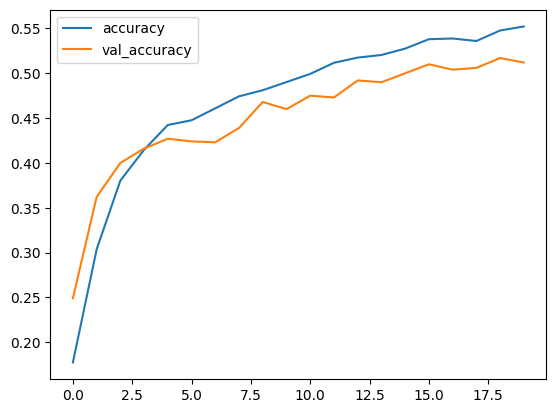

In [ ]:
import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [ ]:
! ls -lh model_checkpoints_best

total 184K
-rw-r--r-- 1 root root   77 Oct 20 15:07 checkpoint
-rw-r--r-- 1 root root 174K Oct 20 15:07 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 20 15:07 checkpoint.index


In [ ]:
! rm -r model_checkpoints # Delete the checkpoints we created just now.
! rm -r model_checkpoints_best # Delete the checkpoints we created just now.

### Saving the entire model

In [ ]:
checkpoint = ModelCheckpoint(
    filepath='model_checkpoints', # Save the model itself to the filepath.
    save_weights_only=False, # Save the entire model instead of just the weights.
    frequency='epoch', # Save the model after every epoch.
    verbose=1
)

clf = cifar_classifier()
clf.fit(X_train, y_train, epochs=3, callbacks=[checkpoint]) # Save the model itself every epoch.

Epoch 1/3
312/313 [============================>.] - ETA: 0s - loss: 1.9006 - accuracy: 0.3057
Epoch 1: saving model to model_checkpoints
313/313 [==============================] - 12s 35ms/step - loss: 1.9004 - accuracy: 0.3059
Epoch 2/3
311/313 [============================>.] - ETA: 0s - loss: 1.5966 - accuracy: 0.4287
Epoch 2: saving model to model_checkpoints
313/313 [==============================] - 11s 34ms/step - loss: 1.5970 - accuracy: 0.4284
Epoch 3/3
313/313 [==============================] - ETA: 0s - loss: 1.4744 - accuracy: 0.4693
Epoch 3: saving model to model_checkpoints
313/313 [==============================] - 10s 33ms/step - loss: 1.4744 - accuracy: 0.4693


In [ ]:
! ls -lh model_checkpoints

total 152K
drwxr-xr-x 2 root root 4.0K Oct 20 15:07 assets
-rw-r--r-- 1 root root   58 Oct 20 15:07 fingerprint.pb
-rw-r--r-- 1 root root  15K Oct 20 15:07 keras_metadata.pb
-rw-r--r-- 1 root root 124K Oct 20 15:07 saved_model.pb
drwxr-xr-x 2 root root 4.0K Oct 20 15:07 variables


In [ ]:
! ls -lh model_checkpoints/variables

total 184K
-rw-r--r-- 1 root root 178K Oct 20 15:07 variables.data-00000-of-00001
-rw-r--r-- 1 root root 1.9K Oct 20 15:07 variables.index


In [ ]:
clf.evaluate(X_test, y_test, verbose=0)

[1.4820014238357544, 0.48399999737739563]

In [ ]:
from tensorflow.keras.models import load_model

del clf # Delete the model

clf = cifar_classifier() # Create a new classifier
clf.evaluate(X_test, y_test, verbose=0) # Obviously, the untrained model performs poorly.

[2.3320820331573486, 0.08799999952316284]

In [ ]:
del clf # Delete the model so that we can check if the loaded model is correct.
clf = load_model('model_checkpoints') # Load the model from the checkpoint file.
clf.evaluate(X_test, y_test, verbose=0) # When we load the model, we can see that the model performs well. And the metrics are the same as before.

[1.4820014238357544, 0.48399999737739563]

In [ ]:
clf.save('classifier.h5') # Save the model as a .h5 file. .h5 is the default format for Keras models.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
del clf # Delete the existing model so that we can check if the loaded model is correct.

clf = load_model('classifier.h5')
clf.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 0s 9ms/step - loss: 1.4820 - accuracy: 0.4840


[1.4820014238357544, 0.48399999737739563]

### Loading pre-trained models

In [ ]:
from tensorflow.keras.applications import ResNet50 # ResNet50 is a famous pre-trained model for image classification.

resnet = ResNet50(weights='imagenet') # Load the pre-trained model with weights trained on ImageNet.
resnet.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

### TensorFlow hub modules

In [ ]:
import tensorflow_hub as hub
# Specify the URL of the TFHub module we want to use.
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
# Load the model.
model = Sequential([hub.KerasLayer(module_url)])
# Define the input shape.
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1343049   
                                                                 
Total params: 1343049 (5.12 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1343049 (5.12 MB)
_________________________________________________________________
